# 引入依赖

In [16]:
import torch
import numpy as np
import random
from torch.utils.data import  Dataset,random_split,DataLoader
import matplotlib.pyplot as plt

# 超参数

In [17]:
batch_size=512
lr  = 0.1
epoch_num = 200

# 手动生成回归任务数据集
满足条件
- 训练集样本数: 7000
- 测试集样本数: 3000

In [18]:
random.seed(42)
torch.manual_seed(42)
class LinearDataset(Dataset):
    def __init__(self):
        self.num_sample = 10000
        self.num_features = 500
        self.X = torch.randn(self.num_sample,self.num_features)
        self.true_W = torch.ones(self.num_features,1)
        self.Y = 0.028+torch.matmul(self.X,self.true_W)+0.01*torch.randn(self.num_sample, 1)
    def __len__(self):
        return self.num_sample
    def __getitem__(self, index):
        return self.X[index],self.Y[index]
train_size = 7000
test_size = 10000 - train_size
dataset = LinearDataset()
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
print("训练集样本数:", len(train_dataset))
print("测试集样本数:", len(test_dataset))
train_loader= DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

训练集样本数: 7000
测试集样本数: 3000


# 定义激活函数 定义网络结构 定义网络初始化参数
# 定义损失函数 定义优化器

In [19]:
inputs = 500
hiddens = 128
out = 1
W_1 = torch.tensor(np.random.normal(0, 0.01, (inputs,hiddens)), dtype=torch.float32)
b_1 = torch.zeros(1,dtype=torch.float32)
W_2= torch.tensor(np.random.normal(0, 0.01, (hiddens,out)), dtype=torch.float32)
b_2 = torch.zeros(1,dtype=torch.float32)
parma = [W_1,b_1,W_2,b_2]
for  i in parma:
    i.requires_grad=True

def relu(x):
    x = torch.max(x,torch.tensor(0.0))
    return x
def net(x):

    t = relu(torch.matmul(x,W_1)+b_1)
    return  torch.matmul(t,W_2)+b_2
def mse(x,y):
    t = torch.sum((x.view(-1)-y.view(-1))**2)
    return t/len(x)

def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size


# 训练

In [20]:
import time

train_loss =[]
test_loss = []
start_time = time.time()
for epoch in range(epoch_num):
    loss_list=[]
    for x,y in train_loader:
        y_hat = net(x)
        l = mse(y_hat,y)
        l.backward()
        sgd(parma,lr,batch_size)
        for i in parma:
            i.grad.data.zero_()
        loss_list.append(l.item())

    train_mean = np.mean(loss_list)
    train_loss.append(train_mean)

    loss_list=[]
    for x,y in test_loader:
        y_hat = net(x)
        l = mse(y_hat,y)
        # print(l)
        loss_list.append(l.item())
    test_mean = np.mean(loss_list)
    test_loss.append(test_mean)
    print("epoch:",epoch+1,"train_loss",train_mean,"test_loss:",test_mean)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

epoch: 1 train_loss 515.5994219098773 test_loss: 523.4193369547526
epoch: 2 train_loss 515.4292079380581 test_loss: 523.3719584147135
epoch: 3 train_loss 516.0566820417132 test_loss: 523.3230234781901
epoch: 4 train_loss 517.616457257952 test_loss: 523.2711995442709
epoch: 5 train_loss 515.0598536900112 test_loss: 523.2146453857422
epoch: 6 train_loss 514.4541342599051 test_loss: 523.1520792643229
epoch: 7 train_loss 514.8555276053293 test_loss: 523.0822194417318
epoch: 8 train_loss 516.0906001499721 test_loss: 523.0027008056641
epoch: 9 train_loss 515.715813773019 test_loss: 522.910888671875
epoch: 10 train_loss 516.6428963797433 test_loss: 522.8026682535807
epoch: 11 train_loss 515.5856432233538 test_loss: 522.6741994222006
epoch: 12 train_loss 514.6301356724331 test_loss: 522.5195159912109
epoch: 13 train_loss 513.8939732142857 test_loss: 522.3308664957682
epoch: 14 train_loss 514.5992104666574 test_loss: 522.0996856689453
epoch: 15 train_loss 514.8108716692243 test_loss: 521.812260

# 模型评估
训练用时36.85秒
从实验数据可以看出，Loss在每个epoch中逐渐减小，直到达到非常小的值。
手动实现的线性回归模型在训练数据上表现良好，Loss逐渐减小，预测精度可能较高。

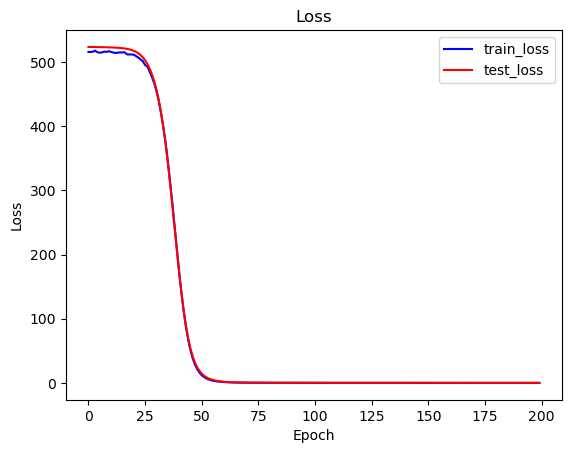

In [21]:

plt.plot(train_loss, 'b-',label="train_loss")
plt.plot(test_loss, 'r-' ,label="test_loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()